# Initialisation
Import the necessary class and define the constants for the Oslo Model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pile import Pile

# Constants
POSSIBLE_THRESHOLD_SLOPES = (1, 2)
OSLO_PROBS = (0.5, 0.5)

# Task 1
## Threshold Slopes Test
Create some length 16 piles with different values of $p$:

In [2]:
probs1 = (1, 0)  # p = 1
probs2 = (0, 1)  # p = 0

pile1 = Pile(16, probs1, POSSIBLE_THRESHOLD_SLOPES)
pile2 = Pile(16, probs2, POSSIBLE_THRESHOLD_SLOPES)

oslo_pile_xs = Pile(16, OSLO_PROBS, POSSIBLE_THRESHOLD_SLOPES)

All threshold slopes of *pile1* should be 1:

In [3]:
pile1.get_threshold_slopes()

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

All threshold slopes of *pile2* should be 2:

In [4]:
pile2.get_threshold_slopes()

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

Around half of the threshold slopes in *oslo_pile_xs* should be 1, and the other half should be 2:

In [5]:
oslo_pile_xs.get_threshold_slopes()

[2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1]

## BTW vs. Oslo Test
Note that *pile1* with $p = 1$ is the BTW model. We can recover its 1D recurrent configuration (staircase) by dropping enough grains on to the pile:

In [6]:
for _ in range(500):
    pile1.drop_grain()
    
pile1.get_heights()

[16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

At the stable state, dropping a grain to the *i*th site of the pile will result in an avalanche size of $s = L - i$, where $s$ is the avalanche size, $L$ the length of the pile.

In [7]:
# i = 0
pile1.drop_grain()
pile1.ava_size

16

In [8]:
# i = 6
pile1.drop_grain(site_index=6)
pile1.ava_size

10

Now we try the same thing with the Oslo pile:

In [9]:
for _ in range(500):
    oslo_pile_xs.drop_grain()
    
oslo_pile_xs.get_heights()

[28, 26, 24, 24, 22, 20, 18, 16, 14, 12, 10, 9, 7, 5, 3, 2]

Finally, we compare the pile heights of the two piles versus time (number of grains dropped):

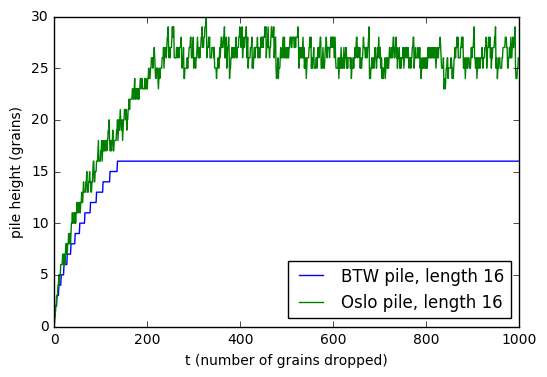

In [12]:
# reinitialise the piles
btw_pile = Pile(16, probs1, POSSIBLE_THRESHOLD_SLOPES, name="BTW pile, length 16")
oslo_pile_xs = Pile(16, OSLO_PROBS, POSSIBLE_THRESHOLD_SLOPES, name="Oslo pile, length 16")

for i in (btw_pile, oslo_pile_xs):
    pile_heights = []
    
    # drop 1000 grains
    for t in range(1000):
        pile_heights.append(i.get_pile_height())
        i.drop_grain()
    plt.plot(pile_heights, label=i.name)
    
plt.xlabel("t (number of grains dropped)")
plt.ylabel("pile height (grains)")
plt.legend(loc=0)
plt.show()

Arriving the recurring configurations, we can keep dropping grains to the *oslo_pile_xs* and the pile height should average to $\langle h \rangle=26.5$.

In [11]:
pile_heights = []

for i in range(5000):
    oslo_pile_xs.drop_grain()
    pile_heights.append(oslo_pile_xs.get_pile_height())
    
np.average(pile_heights)

26.465

As we can see, the Oslo model exhibits very different behaviours to the BTW model.  
These tests have also sufficiently proved the correctness of the program.

---

# Task 2a

## fit the line with smoothed points